In [9]:
# Importing all the required Classes
from Simulation import *
from Particle import *
from Forces import *

# Create a simulation
sim = Simulation()

# Load test particles
# LoadTestParticles(sim)

# Creates the particles
np.random.seed(0)
ParticleCreation(400,sim)

# Add gravity force to the simulation
sim.Forces.append(Gravity())
sim.Forces.append(Lorenz(np.array([2.0,2.0,0.0])))

# Runns the simulation 
sim.Run(10, 0.01)


Setting up enviroment

Running Particle Simulation



100%|███████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.48it/s]


 Simulation:
	Particles = 400
	Simulated time = 10s
	Time intervals = 0.01s
	Compute Time = 14.604475021362305s

Forces:
	Gravity = [ 0.   0.  -9.8]
	Electric = [0. 0. 0.]
	Magnetic = [2. 2. 0.]



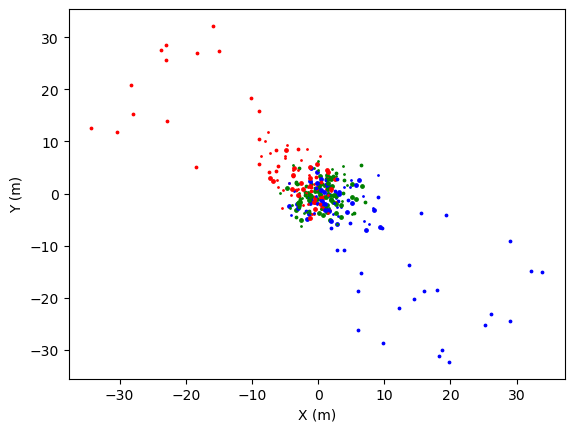

In [10]:
sim.Plot()

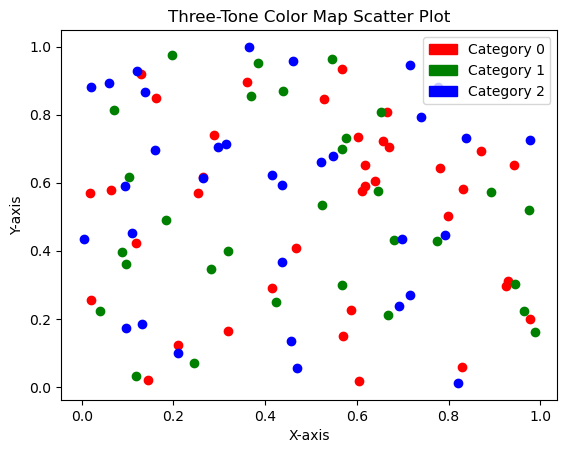

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Generate random data and labels for three categories
np.random.seed(0)
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
categories = np.random.choice([0, 1, 2], num_points)  # Three categories (0, 1, 2)

# Define three distinct colors for the categories
colors = ['red', 'green', 'blue']

# Create a 2D scatter plot with different colors for each category and labels
for category, color in zip(range(3), colors):
    plt.scatter(x[categories == category], y[categories == category], c=color, label=f'Category {category}')

# Customize the plot (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Three-Tone Color Map Scatter Plot')

# Create colored legend patches
legend_patches = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in enumerate(colors)]

# Add a legend with colored patches
plt.legend(handles=legend_patches)

# Show the plot
plt.show()
